In [ ]:
#import required libraries


import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


#ignore warnings
warnings.filterwarnings('ignore')

#seaborn visualization setup
%matplotlib inline
sns.set_style('darkgrid')


In [ ]:
#reading the dataset

data=pd.read_csv('/content/diabetes.csv')
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
data.shape

(768, 9)

In [ ]:
# getting the statistical measures of the data
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

            0 --> Non-Diabetic

            1 --> Diabetic

In [ ]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
# separating the data and labels
X = data.drop(columns = 'Outcome', axis=1)
Y = data['Outcome']

In [ ]:
print(X)

     Pregnancies  Glucose  BloodPressure  ...   BMI  Pedigree  Age
0              6      148             72  ...  33.6     0.627   50
1              1       85             66  ...  26.6     0.351   31
2              8      183             64  ...  23.3     0.672   32
3              1       89             66  ...  28.1     0.167   21
4              0      137             40  ...  43.1     2.288   33
..           ...      ...            ...  ...   ...       ...  ...
763           10      101             76  ...  32.9     0.171   63
764            2      122             70  ...  36.8     0.340   27
765            5      121             72  ...  26.2     0.245   30
766            1      126             60  ...  30.1     0.349   47
767            1       93             70  ...  30.4     0.315   23

[768 rows x 8 columns]


In [ ]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Data Standardization

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
standardized_data = scaler.transform(X)

In [ ]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
X = standardized_data
Y = data['Outcome']

In [ ]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Training the model

In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Making Predictive System

In [ ]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The person is diabetic


In [ ]:
data.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  ...  Pedigree  Age  Outcome
0              6      148             72  ...     0.627   50        1
1              1       85             66  ...     0.351   31        0
2              8      183             64  ...     0.672   32        1
3              1       89             66  ...     0.167   21        0
4              0      137             40  ...     2.288   33        1
..           ...      ...            ...  ...       ...  ...      ...
763           10      101             76  ...     0.171   63        0
764            2      122             70  ...     0.340   27        0
765            5      121             72  ...     0.245   30        0
766            1      126             60  ...     0.349   47        1
767            1       93             70  ...     0.315   23        0

[768 rows x 9 columns]>

In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Pedigree', 'Age', 'Outcome'],
      dtype='object')

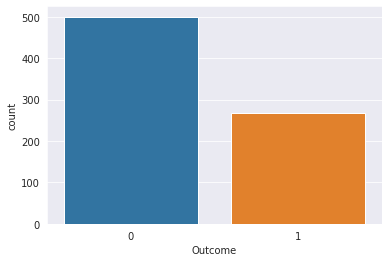

In [ ]:
#plot the distribution of outcome
sns.countplot(x='Outcome',data=data)

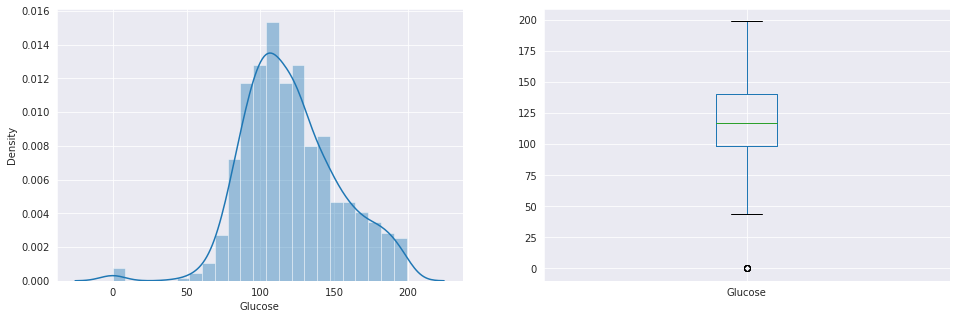

In [ ]:
plt.figure(1)
plt.subplot(121), sns.distplot(data['Glucose'])
plt.subplot(122), data['Glucose'].plot.box(figsize=(16,5))
plt.show()

Distribution of Glucose

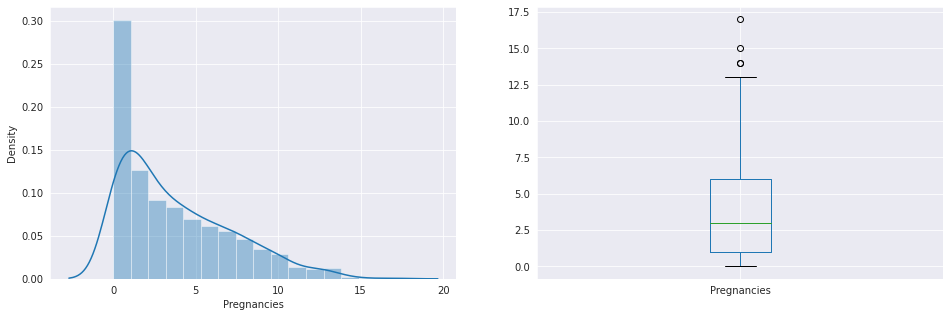

In [ ]:
plt.figure(2)
plt.subplot(121), sns.distplot(data['Pregnancies'])
plt.subplot(122), data['Pregnancies'].plot.box(figsize=(16,5))
plt.show()

Ditribution of Pregnancies

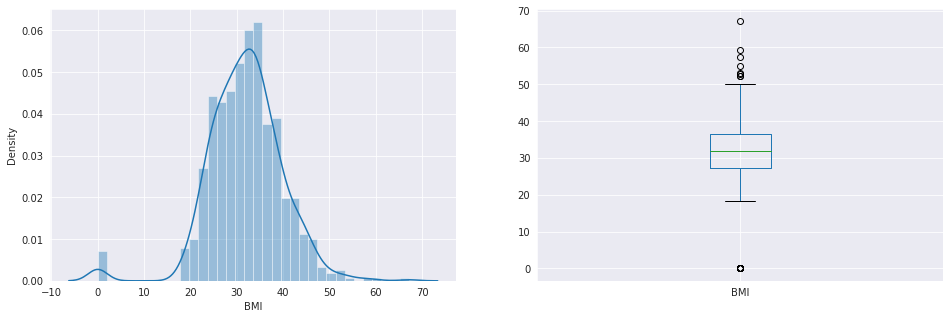

In [ ]:
plt.subplot(121), sns.distplot(data['BMI'])
plt.subplot(122), data['BMI'].plot.box(figsize=(16,5))
plt.show()

Distribution of BMI

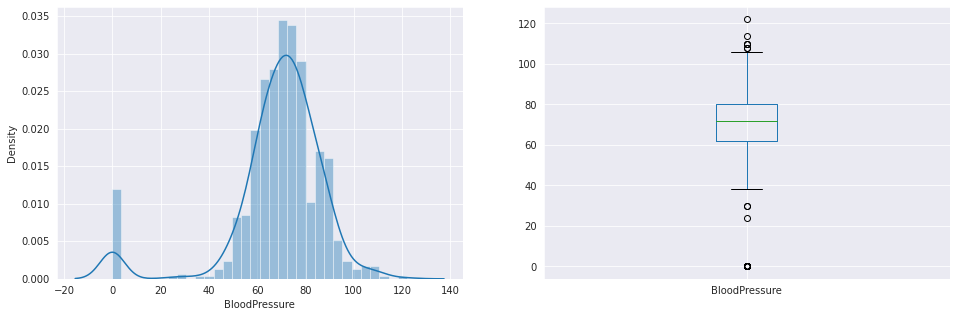

In [ ]:
plt.subplot(121), sns.distplot(data['BloodPressure'])
plt.subplot(122), data['BloodPressure'].plot.box(figsize=(16,5))
plt.show()

Distribution of BloodPressure

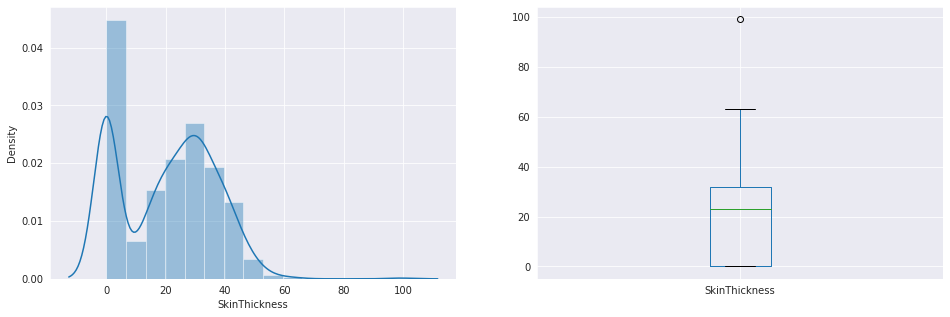

In [ ]:
plt.subplot(121), sns.distplot(data['SkinThickness'])
plt.subplot(122), data['SkinThickness'].plot.box(figsize=(16,5))
plt.show()

Distribution of SkinThickness

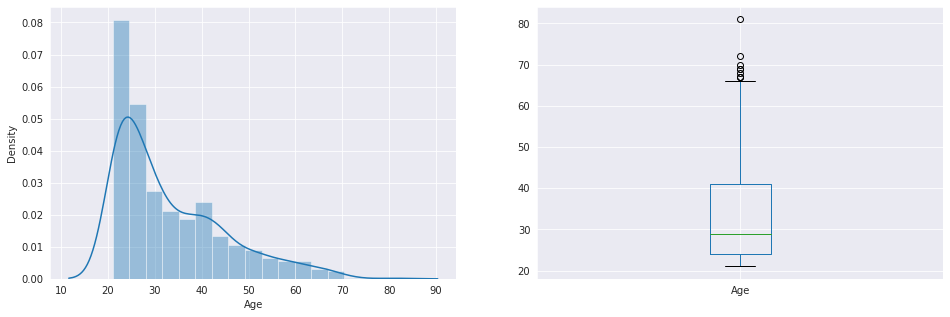

In [ ]:
plt.subplot(121), sns.distplot(data['Age'])
plt.subplot(122), data['Age'].plot.box(figsize=(16,5))
plt.show()

In [ ]:
Distribution of Age

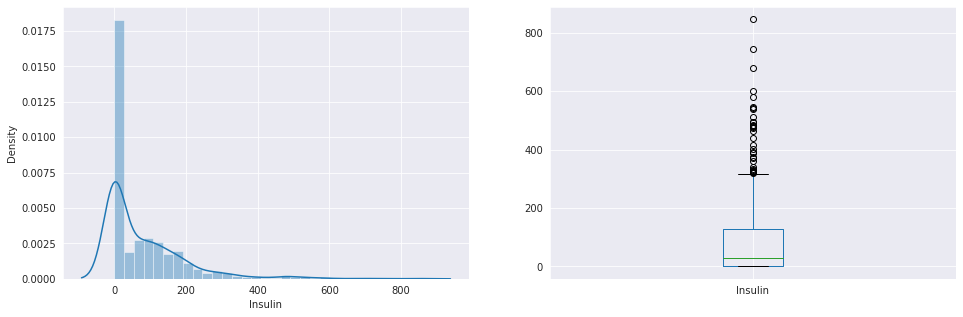

In [ ]:
plt.subplot(121), sns.distplot(data['Insulin'])
plt.subplot(122), data['Insulin'].plot.box(figsize=(16,5))
plt.show()

Distribution of Insulin

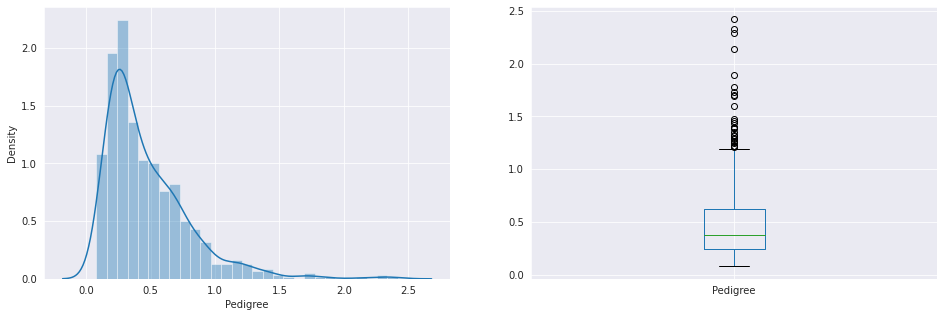

In [ ]:
plt.subplot(121), sns.distplot(data['Pedigree'])
plt.subplot(122), data['Pedigree'].plot.box(figsize=(16,5))
plt.show()

Distribution of DiabetesPedigreeFunction

In [ ]:
#check missing values

data.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

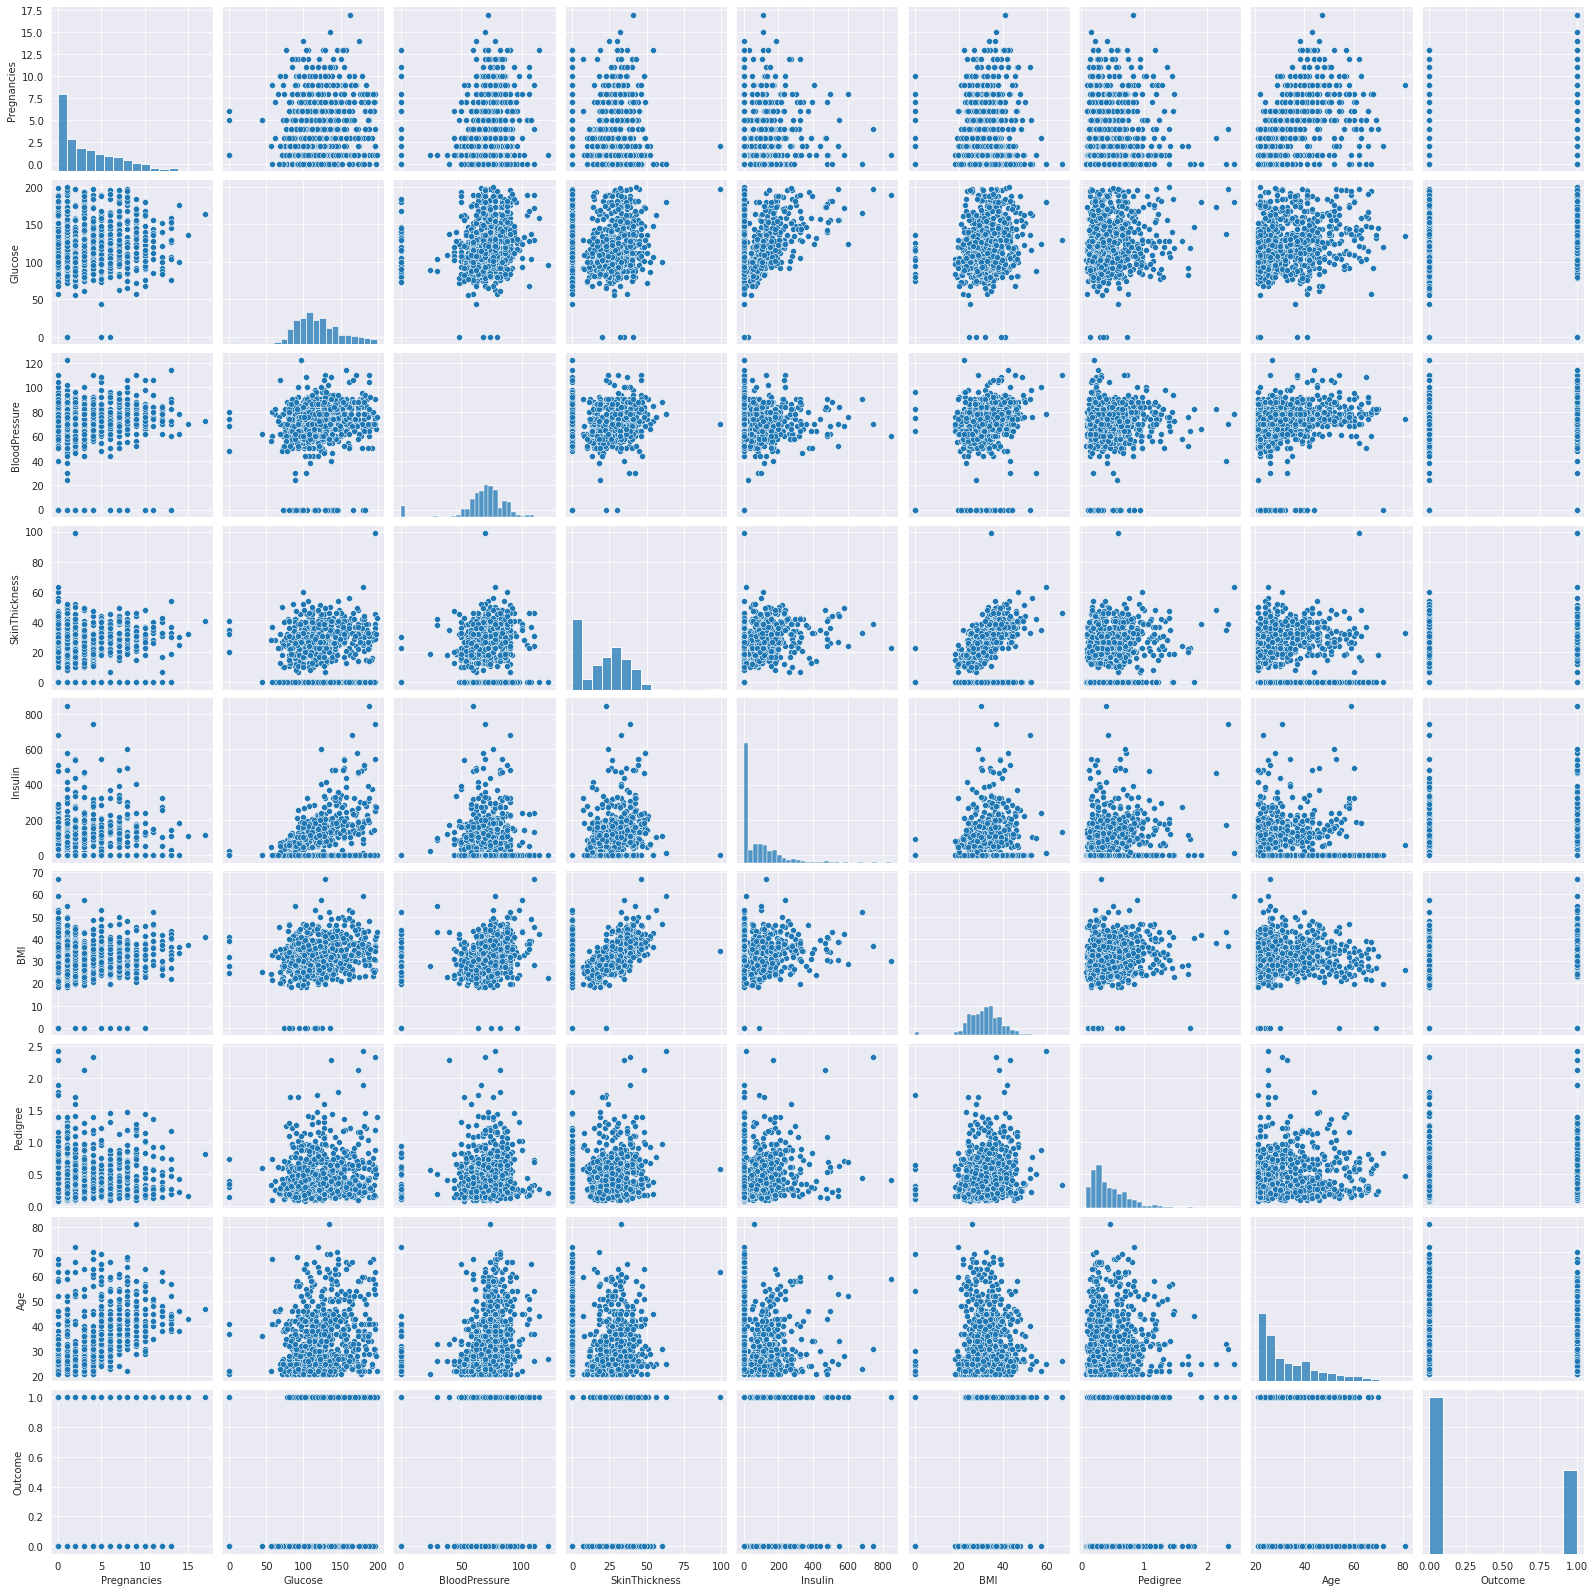

In [ ]:
sns.pairplot(data)

In [ ]:
#check correlations

data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
Pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


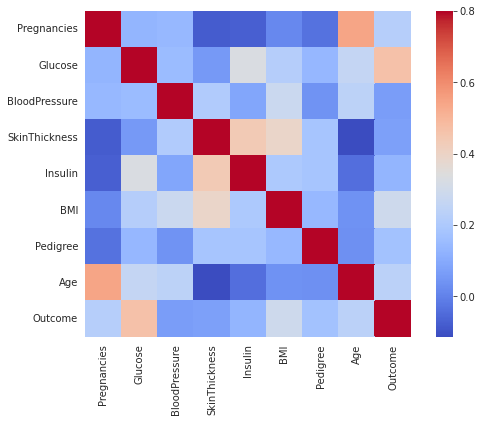

In [ ]:
matrix = data.corr()
ax = plt.subplots(figsize=(9,6)), sns.heatmap(matrix,vmax=.8, square=True, cmap="coolwarm")

In [ ]:
#splitting the dataset

X=data.drop('Outcome',axis=1)
Y=data['Outcome']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3,random_state=101)

In [ ]:
#check columns with zero values
print("Total number of rows: {0}", format(len(data)))
print("Number of rows missing Pregnancies:{0}",format(len(data.loc[data['Pregnancies']==0])))
print("Number of rows missing Glucose:{0}",format(len(data.loc[data['Glucose']==0])))
print("Number of rows missing BloodPressure:{0}",format(len(data.loc[data['BloodPressure']==0])))
print("Number of rows missing SkinThickness:{0}",format(len(data.loc[data['SkinThickness']==0])))
print("Number of rows missing Insulin:{0}",format(len(data.loc[data['Insulin']==0])))
print("Number of rows missing BMI:{0}",format(len(data.loc[data['BMI']==0])))
print("Number of rows missing Pedigree:{0}",format(len(data.loc[data['Pedigree']==0])))
print("Number of rows missing Age:{0}",format(len(data.loc[data['Age']==0])))

Total number of rows: {0} 768
Number of rows missing Pregnancies:{0} 111
Number of rows missing Glucose:{0} 5
Number of rows missing BloodPressure:{0} 35
Number of rows missing SkinThickness:{0} 227
Number of rows missing Insulin:{0} 374
Number of rows missing BMI:{0} 11
Number of rows missing Pedigree:{0} 0
Number of rows missing Age:{0} 0


Building the model

1.Random Forest

In [ ]:
#Building the model using RandomForest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
predictions=rf.predict(X_test)

In [ ]:
#Getting the accuracy score for Random Forest
from sklearn import metrics
print("Accuracy_Score=",format(metrics.accuracy_score(Y_test,predictions)))

Accuracy_Score= 0.7705627705627706


Random Forest gives an accuracy_score of 0.7705

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

[[128  22]
 [ 31  50]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       150
           1       0.69      0.62      0.65        81

    accuracy                           0.77       231
   macro avg       0.75      0.74      0.74       231
weighted avg       0.77      0.77      0.77       231



2.Decision Tree

In [ ]:
#Building the model using DecisionTree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
predictions=tree.predict(X_test)

In [ ]:
#Getting the accuracy score for Decision Tree
from sklearn import metrics
print("Accuracy_Score=",format(metrics.accuracy_score(Y_test,predictions)))



Accuracy_Score= 0.7922077922077922


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

[[133  17]
 [ 31  50]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       150
           1       0.75      0.62      0.68        81

    accuracy                           0.79       231
   macro avg       0.78      0.75      0.76       231
weighted avg       0.79      0.79      0.79       231



3.XGBoost

In [ ]:
#Building model using XGBoost
from xgboost import XGBClassifier
xgb_model=XGBClassifier(gamma=0)
xgb_model.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

3.SVM

In [ ]:
#Building the model using SVM
from sklearn.svm import SVC
svc_model=SVC()
svc_model.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svc_pred=svc=svc_model.predict(X_test)

In [ ]:
#Accuracy score for SVM
from sklearn import metrics
print("Accuracy Score=", format(metrics.accuracy_score(Y_test, svc_pred)))

Accuracy Score= 0.7792207792207793


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, svc_pred))
print(classification_report(Y_test, svc_pred))

[[139  11]
 [ 40  41]]
              precision    recall  f1-score   support

           0       0.78      0.93      0.84       150
           1       0.79      0.51      0.62        81

    accuracy                           0.78       231
   macro avg       0.78      0.72      0.73       231
weighted avg       0.78      0.78      0.76       231



4.Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(X_train, Y_train)

In [ ]:
predictions=logreg.predict(X_test)

In [ ]:
from sklearn import metrics
print("Accuracy Score=",format(metrics.accuracy_score(Y_test,predictions)))

Accuracy Score= 0.7922077922077922


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

[[133  17]
 [ 31  50]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       150
           1       0.75      0.62      0.68        81

    accuracy                           0.79       231
   macro avg       0.78      0.75      0.76       231
weighted avg       0.79      0.79      0.79       231

